On considère que le poids des chiots bergers allemands à la naissance suit une distribution normale, de moyenne 0,150 kg et de variance 0,015. 

On suspecte cependant que les chiennes diabétiques mettent au monde des chiots qui ont en moyenne un poids inférieur à 0,150 kg.

Afin de vérifier cette hypothèse, on a relevé le poids de 25 chiots bergers allemands nés de mères diabétiques et le poids moyen observé a été de 0,125 kg.

Est-ce que cette expérience confirme l'hypothèse initiale (la suspicion) avec un seuil de signification de 3% ?

- h0 : p = 0.15
- h1 : p < 0.15

Moyenne observée = 0.125
Sigma moyenne = 0.02449489742783178
Valeur observée Z = -1.0206207261596574
Seuil critique = -1.8807936081512509
On ne rejette pas H0 : 


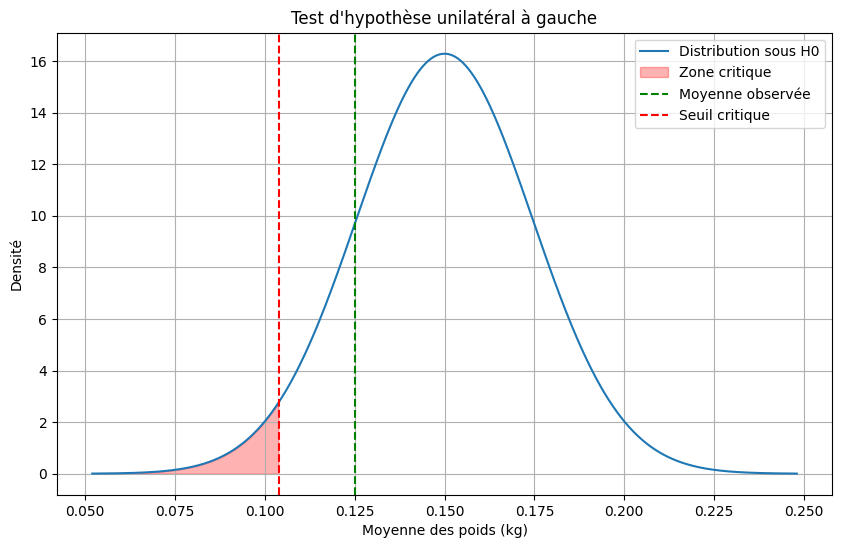

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu = 0.15
sigma = 0.015 ** 0.5

n = 25
moyenne_observee = 0.125
alpha = 0.03

sigma_moyenne = sigma / math.sqrt(n)

Z = (moyenne_observee - mu) / sigma_moyenne

Z_crit = norm.ppf(1 - alpha)
Z_crit = -Z_crit  # Pour un test unilatéral à gauche

print("Moyenne observée =", moyenne_observee)
print("Sigma moyenne =", sigma_moyenne)
print("Valeur observée Z =", Z)
print("Seuil critique =", Z_crit)

# Test unilatéral à gauche
if Z <= Z_crit:
    print("On rejette H0 : ")
else:
    print("On ne rejette pas H0 : ")


# --- Graphique ---
x = np.linspace(mu - 4*sigma_moyenne, mu + 4*sigma_moyenne, 1000)
y = norm.pdf(x, mu, sigma_moyenne)

plt.figure(figsize=(10,6))
plt.plot(x, y, label="Distribution sous H0")
plt.fill_between(x, 0, y, where=(x <= mu + Z_crit*sigma_moyenne), color='red', alpha=0.3, label="Zone critique")
plt.axvline(moyenne_observee, color='green', linestyle='--', label="Moyenne observée")
plt.axvline(mu + Z_crit*sigma_moyenne, color='red', linestyle='--', label="Seuil critique")
plt.title("Test d'hypothèse unilatéral à gauche")
plt.xlabel("Moyenne des poids (kg)")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.show()
